In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("Set1")
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Data Exploration**

In [2]:
netflix=pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
netflix.shape

(8790, 10)

# **Data Cleaning**

In [5]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
netflix.duplicated().sum()

0

In [7]:
netflix.drop(columns="show_id", inplace=True )

In [8]:
netflix.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# **Data Preprocessing** **&** **Data visualization**

**Type**

In [9]:
type_netflix=netflix.type.value_counts()
type_netflix

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

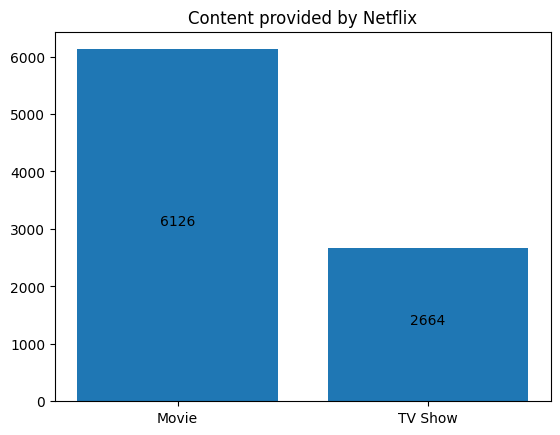

In [10]:
plt.bar(type_netflix.index,type_netflix)
for i in range(len(type_netflix)):
    plt.text(i , type_netflix[i]//2,type_netflix[i], ha='center')
plt.title('Content provided by Netflix')
plt.show()

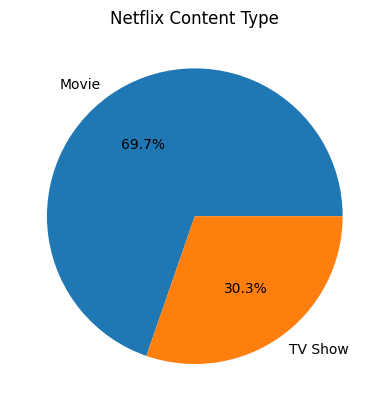

In [11]:
plt.pie(type_netflix,autopct='%1.1f%%',labels=type_netflix.index)
plt.title("Netflix Content Type")
plt.show()

**Show added in year**

In [12]:
release_year =netflix.groupby(['release_year'])['type'].count()
release_year[-11:]

release_year
2011     185
2012     236
2013     286
2014     352
2015     555
2016     901
2017    1030
2018    1146
2019    1030
2020     953
2021     592
Name: type, dtype: int64

In [13]:
netflix['date_added']=pd.to_datetime(netflix["date_added"])
netflix['date_added'].head(10)

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
5   2021-09-24
6   2021-09-24
7   2021-05-01
8   2021-09-23
9   2021-05-01
Name: date_added, dtype: datetime64[ns]

In [14]:
date_added=netflix.groupby(netflix['date_added'].dt.year)['type'].count()
date_added

date_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: type, dtype: int64

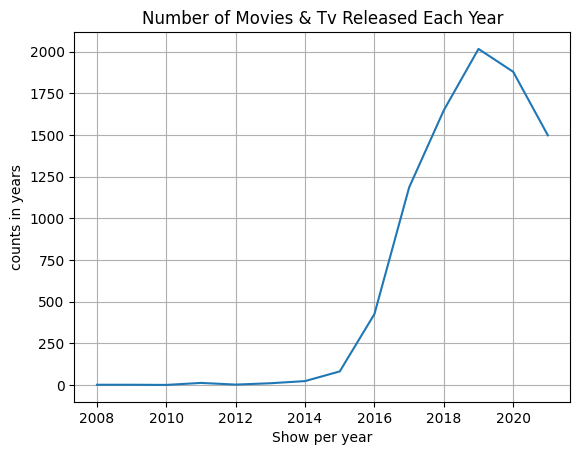

In [15]:
plt.plot(date_added.index,date_added)
plt.title('Number of Movies & Tv Released Each Year')
plt.xlabel('Show per year')
plt.ylabel('counts in years')
plt.grid()
plt.show()

**Country**

In [16]:
country=netflix['country'].value_counts()[:11]
country

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Name: count, dtype: int64

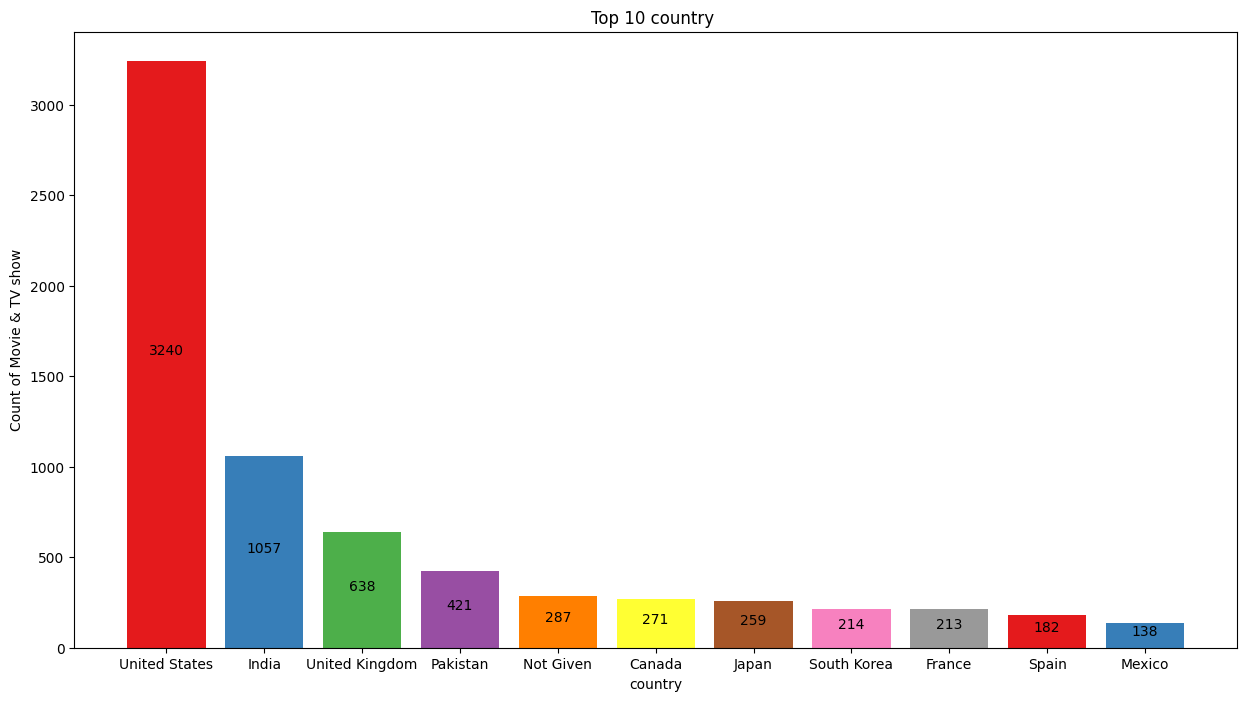

In [17]:
plt.figure(figsize=(15, 8))
plt.bar(country.index,country, color= palette)
for i in range(len(country)):
    plt.text(i , country[i]//2,country[i], ha ='center')
plt.title('Top 10 country ')
plt.xlabel('country')
plt.ylabel("Count of Movie & TV show")
plt.show()

**Director**

In [18]:
director = netflix['director'].value_counts()
director

director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

In [19]:
Given_director=director.sum()- director[0]
print( f'Director Given Name = {Given_director}')
print(f'We have {director[0]} Movie & TV show with not given name director')

Director Given Name = 6202
We have 2588 Movie & TV show with not given name director


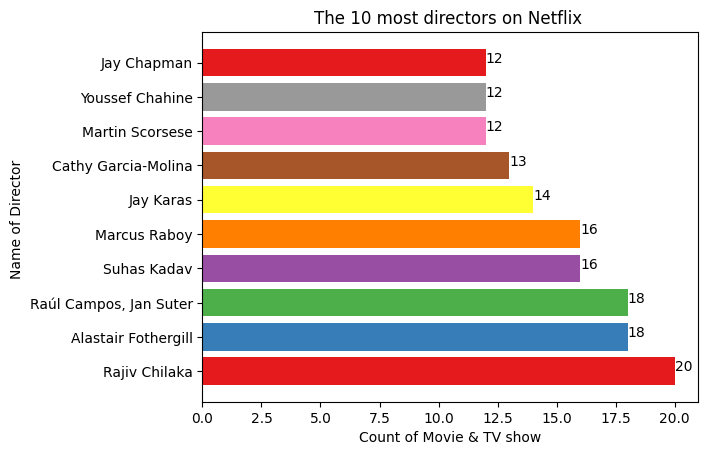

In [20]:
plt.barh(director[1:11].index,director[1:11],color=palette)
plt.title('The 10 most directors on Netflix ')
for index , value in enumerate(director[1:11]):
    plt.text(value , index, str(value))
plt.xlabel('Count of Movie & TV show')
plt.ylabel('Name of Director ')
plt.show()

**Rating**

In [21]:
rating=netflix['rating'].value_counts()
rating

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

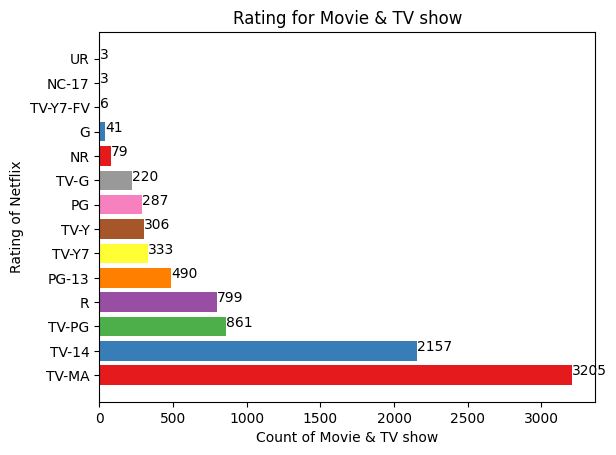

In [22]:
plt.barh(rating.index,rating, color =palette)
for index , value in enumerate(rating):
    plt.text(value, index,str(value))
plt.xlabel('Count of Movie & TV show')
plt.ylabel('Rating of Netflix')
plt.title('Rating for Movie & TV show')
plt.show()

In [23]:
rating=pd.crosstab([netflix.rating],[netflix.type])
rating

type,Movie,TV Show
rating,,
G,41,0
NC-17,3,0
NR,75,4
PG,287,0
PG-13,490,0
R,797,2
TV-14,1427,730
TV-G,126,94
TV-MA,2062,1143


# **Some conclusions**

***1-The Netflix platform is diverse in showing both Movies and TV shows***

***2-Netflix is ​​also available in many countries around the world, most notably America, India, and the United Kingdom***

***3-The platform began in 1925, and until now it continues to increase in terms of tv shows and movie***

***4-The platform witnessed a decline in production after 2019, and this was evident in the years 2020 and 2021, due to the global pandemic Covid-19.***

***5-The most popular Rating reviews are: TV-MA & TV-14 ***

***6-There are many distinguished directors on the platform, the most prominent of whom are: rajiv chilaka & alastair fothergill & raul campos  ***

****I hope I covered all aspects
Dont forget to upvote ****